In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style

In [2]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv("연도별1인기구통계.csv", encoding = 'cp949')

In [4]:
data

,행정구역별(시군구),성별,2018,2017,2016,2015
0,행정구역별(시군구),성별,1인가구,1인가구,1인가구,1인가구
1,전국,계,5848594,5618677,5397615,5203440
2,전국,남자,2906320,2791849,2675861,2592963
3,전국,여자,2942274,2826828,2721754,2610477
4,서울특별시,계,1229421,1180540,1138860,1115744
5,서울특별시,남자,581944,561524,544607,544059
6,서울특별시,여자,647477,619016,594253,571685
7,경기도,계,1197586,1124541,1067916,1026471
8,경기도,남자,647041,607758,574609,556495
9,경기도,여자,550545,516783,493307,469976


In [5]:
df1 = data.loc[4,["2015", "2016", "2017", "2018"]] # 2015년 ~ 2018년 서울특별시 1인기구 남녀합 통계 추출 
df2 = data.loc[5,["2015", "2016", "2017", "2018"]] # 2015년 ~ 2018년 서울특별시 1인기구 남자 통계 추출 
df3 = data.loc[6,["2015", "2016", "2017", "2018"]] # 2015년 ~ 2018년 서울특별시 1인기구 여자 통계 추출 

In [6]:
xData = [1, 2, 3, 4] # Tensorflow에서 학습할 데이터(년도) : 해당 데이터에서는 2015~2018년 고정
xData1 = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024] # 2015년 ~2024년까지 데이터 예측
yData1 = [] # Tensorflow에사 학습할 데이터에 대한 값이 들어가는 데이터(1인기구수)
yData2 = [] # Tensorflow에사 학습할 데이터에 대한 값이 들어가는 데이터(1인기구수: 남)
yData3 = [] # Tensorflow에사 학습할 데이터에 대한 값이 들어가는 데이터(1인기구수: 여)

for row in df1:
    yData1.append(int(row))
for row in df2:
    yData2.append(int(row))
for row in df3:
    yData3.append(int(row))
print(yData1)
print(yData2)
print(yData3)

[1115744, 1138860, 1180540, 1229421]
[544059, 544607, 561524, 581944]
[571685, 594253, 619016, 647477]


In [7]:
# 서울특별시 1인가구수 학습
W = tf.Variable(tf.random.uniform([1], -100, 100)) # -100부터 100까지 랜덤한 값을 가진다
b = tf.Variable(tf.random.uniform([1], -100, 100))
X = tf.compat.v1.placeholder(tf.float32)
Y = tf.compat.v1.placeholder(tf.float32)
H = W * X + b
cost = tf.reduce_mean(tf.square(H - Y)) #reduce mean은 평균값을 의미한다
a = tf.Variable(0.01) #경사하강에서 얼나 경사하강을 할지 정해준다. 이값이 커지면 부정확해진다
optimizer = tf.compat.v1.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost) #값을 최소화 하는 방향으로 설정
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)
#학습을 시키는 파트
for i in range(5001):
    sess.run(train, feed_dict = {X: xData, Y: yData1})
    if i % 500 == 0:
        print(i, sess.run(cost, feed_dict = {X: xData, Y: yData1}),sess.run(W),sess.run(b))
# x의 6번째 값의 예측한 값을 출력한다
print(sess.run(H, feed_dict={X: [6]})) # 2020년도 1인 가구수 예측
result_2020 = sess.run(H, feed_dict={X: [6]})

0 990288100000.0 [59203.1] [23298.201]
500 7480082400.0 [110043.7] [859443.3]
1000 413967800.0 [54298.66] [1023340.5]
1500 61599476.0 [41850.395] [1059940.]
2000 44025996.0 [39070.38] [1068113.5]
2500 43149800.0 [38449.883] [1069938.]
3000 43105976.0 [38311.7] [1070344.2]
3500 43103348.0 [38280.086] [1070437.4]
4000 43103660.0 [38277.453] [1070444.5]
4500 43103660.0 [38277.453] [1070444.5]
5000 43103660.0 [38277.453] [1070444.5]
[1300109.2]


In [8]:
for i in range(5, 11):  # 2019년 ~ 2024년까지 데이터 예측하여 리스트에 추가
    yData1.append(int(sess.run(H, feed_dict={X: [i]})))
print(yData1)

[1115744, 1138860, 1180540, 1229421, 1261831, 1300109, 1338386, 1376664, 1414941, 1453219]


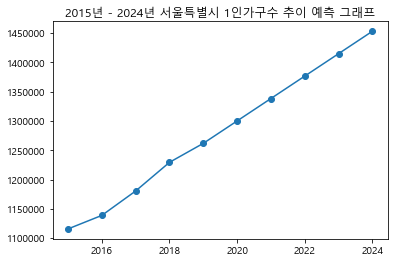

In [9]:
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.title('2015년 - 2024년 서울특별시 1인가구수 추이 예측 그래프')
ax.plot(xData1, yData1, marker='o')

In [10]:
# 서울특별시 남자 1인가구수 학습
sess.run(init)
#학습을 시키는 파트
for i in range(5001):
    sess.run(train, feed_dict = {X: xData, Y: yData2})
    if i % 500 == 0:
        print(i, sess.run(cost, feed_dict = {X: xData, Y: yData2}),sess.run(W),sess.run(b))
# x의 6번째 값의 예측한 값을 출력한다
print(sess.run(H, feed_dict={X: [6]})) # 2020년도 남자 1인 가구수 예측
result_2020 = sess.run(H, feed_dict={X: [6]})

0 226997570000.0 [28304.582] [11162.598]
500 1831878800.0 [48417.39] [421427.22]
1000 116765990.0 [20953.422] [502174.66]
1500 31239006.0 [14820.501] [520206.2]
2000 26974082.0 [13451.012] [524232.66]
2500 26761390.0 [13145.247] [525131.6]
3000 26750736.0 [13077.202] [525331.75]
3500 26750266.0 [13061.593] [525377.75]
4000 26750172.0 [13060.328] [525381.1]
4500 26750172.0 [13060.328] [525381.1]
5000 26750172.0 [13060.328] [525381.1]
[603743.1]


In [11]:
for i in range(5, 11):  # 2019년 ~ 2024년까지 데이터 예측하여 리스트에 추가
    yData2.append(int(sess.run(H, feed_dict={X: [i]})))
print(yData2)

[544059, 544607, 561524, 581944, 590682, 603743, 616803, 629863, 642924, 655984]


In [12]:
# 서울특별시 여자 1인가구수 학습
sess.run(init)
#학습을 시키는 파트
for i in range(5001):
    sess.run(train, feed_dict = {X: xData, Y: yData3})
    if i % 500 == 0:
        print(i, sess.run(cost, feed_dict = {X: xData, Y: yData3}),sess.run(W),sess.run(b))
# x의 6번째 값의 예측한 값을 출력한다
print(sess.run(H, feed_dict={X: [6]})) # 2020년도 여자 1인 가구수 예측
result_2020 = sess.run(H, feed_dict={X: [6]})

0 268667630000.0 [31025.334] [12255.679]
500 1915814000.0 [61621.137] [438031.3]
1000 97624330.0 [33343.957] [521169.7]
1500 6957141.0 [27029.377] [539735.25]
2000 2435962.5 [25619.273] [543881.1]
2500 2210557.5 [25304.547] [544806.5]
3000 2199309.2 [25234.486] [545012.5]
3500 2198733.0 [25218.496] [545059.6]
4000 2198713.0 [25217.03] [545063.6]
4500 2198713.0 [25217.03] [545063.6]
5000 2198713.0 [25217.03] [545063.6]
[696365.8]


In [13]:
for i in range(5, 11):  # 2019년 ~ 2024년까지 데이터 예측하여 리스트에 추가
    yData3.append(int(sess.run(H, feed_dict={X: [i]})))
print(yData3)

[571685, 594253, 619016, 647477, 671148, 696365, 721582, 746799, 772016, 797233]


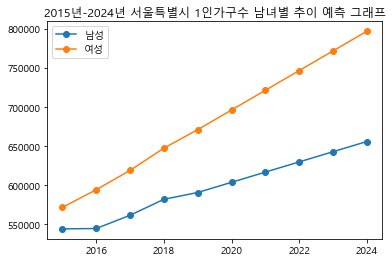

In [14]:
# 서울특별시 1인가구수 남녀별 추이 예측 그래프 출력
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.title('2015년-2024년 서울특별시 1인가구수 남녀별 추이 예측 그래프')
ax.plot(xData1, yData2, marker='o')
ax.plot(xData1, yData3, marker='o')
plt.legend(['남성', '여성'])

In [15]:
# 서울 전체 가구수 추이
data2 = pd.read_csv("서울특별시총가구.csv", encoding = 'cp949')
data2

,행정구역별(읍면동),2015,2015.1,2015.2,2015.3,2016,2016.1,2016.2,2016.3,2017,2017.1,2017.2,2017.3,2018,2018.1,2018.2,2018.3
0,행정구역별(읍면동),총가구_가구 (가구),총가구_가구원_계 (명),총가구_가구원_남자 (명),총가구_가구원_여자 (명),총가구_가구 (가구),총가구_가구원_계 (명),총가구_가구원_남자 (명),총가구_가구원_여자 (명),총가구_가구 (가구),총가구_가구원_계 (명),총가구_가구원_남자 (명),총가구_가구원_여자 (명),총가구_가구 (가구),총가구_가구원_계 (명),총가구_가구원_남자 (명),총가구_가구원_여자 (명)
1,전국,19560603,51069375,25608502,25460873,19837665,51269554,25696987,25572567,20167922,51422507,25768055,25654452,20499543,51629512,25877195,25752317
2,서울특별시,3914820,9904312,4859535,5044777,3915023,9805506,4799115,5006391,3948850,9741871,4757642,4984229,3981741,9673936,4718972,4954964
3,경기도,4537581,12479061,6309661,6169400,4647205,12671956,6405301,6266655,4773632,12851601,6502723,6348878,4934208,13103188,6635106,6468082


In [16]:
df4 = data2.loc[2,["2015", "2016", "2017", "2018"]] # 2015년 ~ 2018년 서울특별시 총가구수 통계 추출 

In [17]:
yData4 = [] # Tensorflow에사 학습할 데이터에 대한 값이 들어가는 데이터(서울 총 인구)

for row in df4:
    yData4.append(int(row))
print(yData4)

[3914820, 3915023, 3948850, 3981741]


In [18]:
# 서울특별시 총 가구수 학습
sess.run(init)
#학습을 시키는 파트
for i in range(5001):
    sess.run(train, feed_dict = {X: xData, Y: yData4})
    if i % 500 == 0:
        print(i, sess.run(cost, feed_dict = {X: xData, Y: yData4}),sess.run(W),sess.run(b))
# x의 6번째 값의 예측한 값을 출력한다
print(sess.run(H, feed_dict={X: [6]})) # 2020년도 서울 총 인구 예측
result_2020 = sess.run(H, feed_dict={X: [6]})

0 11377928000000.0 [197562.81] [78716.3]
500 99873930000.0 [286370.] [3108470.8]
1000 5058057000.0 [82169.48] [3708845.]
1500 329849730.0 [36569.17] [3842915.5]
2000 94084560.0 [26386.51] [3872853.8]
2500 82329090.0 [24112.98] [3879538.]
3000 81743150.0 [23605.953] [3881028.5]
3500 81712840.0 [23493.8] [3881358.2]
4000 81711736.0 [23471.531] [3881423.5]
4500 81711736.0 [23471.531] [3881423.5]
5000 81711736.0 [23471.531] [3881423.5]
[4022252.8]


In [19]:
for i in range(5, 11):  # 2019년 ~ 2024년까지 데이터 예측하여 리스트에 추가
    yData4.append(int(sess.run(H, feed_dict={X: [i]})))
print(yData4)

[3914820, 3915023, 3948850, 3981741, 3998781, 4022252, 4045724, 4069195, 4092667, 4116138]


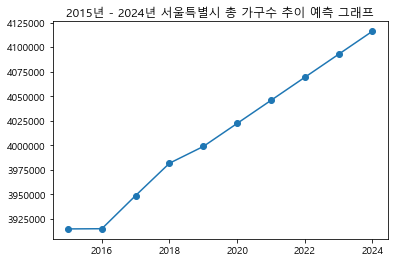

In [20]:
# 서울특별시 총 가구수 추이 예측 그래프 출력
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.title('2015년 - 2024년 서울특별시 총 가구수 추이 예측 그래프')
ax.plot(xData1, yData4, marker='o')

In [21]:
percentage1 = []
percentage2 = []
percentage3 = []
for i in range(len(yData1)):
    percentage1.append(round(float((yData1[i]/yData4[i])*100), 1))
    percentage2.append(round(float((yData2[i]/yData4[i])*100), 1))
    percentage3.append(round(float((yData3[i]/yData4[i])*100), 1))
print(percentage1)
print(percentage2)
print(percentage3)

[28.5, 29.1, 29.9, 30.9, 31.6, 32.3, 33.1, 33.8, 34.6, 35.3]
[13.9, 13.9, 14.2, 14.6, 14.8, 15.0, 15.2, 15.5, 15.7, 15.9]
[14.6, 15.2, 15.7, 16.3, 16.8, 17.3, 17.8, 18.4, 18.9, 19.4]


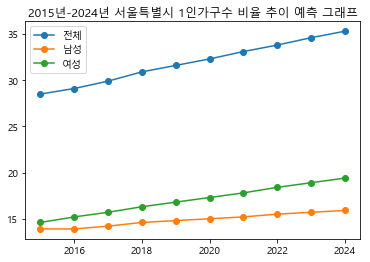

In [22]:
# 1인 가구수 비율 추이 그래프로 보기
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
plt.title('2015년-2024년 서울특별시 1인가구수 비율 추이 예측 그래프')
ax.plot(xData1, percentage1, marker='o')
ax.plot(xData1, percentage2, marker='o')
ax.plot(xData1, percentage3, marker='o')
plt.legend(['전체', '남성', '여성'])

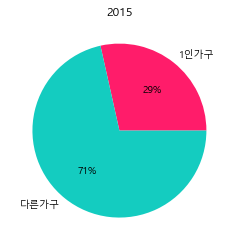

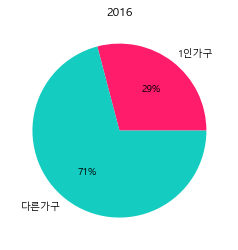

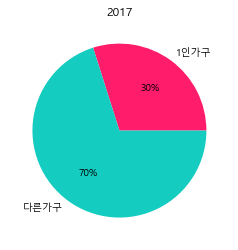

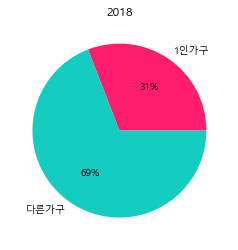

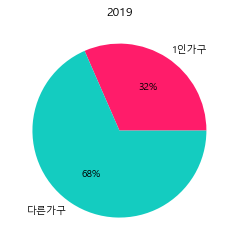

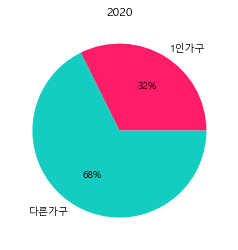

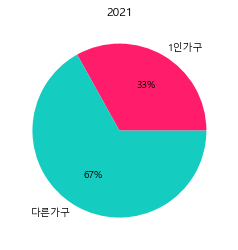

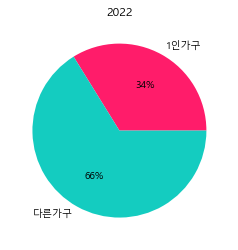

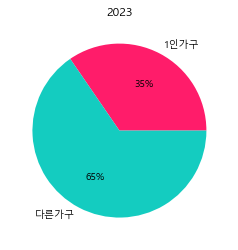

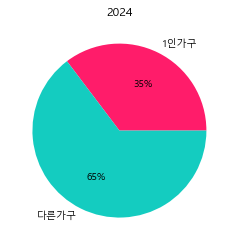

In [23]:
# 1인 가구수 비율 추이 파이 그래프로 보기

label = ['1인가구','다른가구']
c = ['#FF1C6A', '#14CCC0']
for i in range(len(yData1)):
    pieList = []
    pieList.append(yData1[i])
    pieList.append(yData4[i]-yData1[i])
    plt.title(xData1[i])
    plt.pie(pieList, labels=label, colors=c, autopct='%1.f%%')
    plt.show()